### Introduction to ANN's with Keras

- Classification with ANN
- Regression with ANN
- Images with ANN's 

In [1]:
#!pip install tensorflow
#!pip install keras

In [3]:
import keras

from sklearn.datasets import fetch_california_housing

In [4]:
cali = fetch_california_housing()

In [5]:
X, y = cali.data, cali.target

In [8]:
import pandas as pd
pd.DataFrame(X, columns = cali.feature_names)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [11]:
scaler = MaxAbsScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
from keras.models import Sequential
from keras.layers import Dense

In [51]:
network = Sequential()

network.add(Dense(4, input_shape = (X_train.shape[1], ), activation = 'relu'))

network.add(Dense(1, activation = 'linear'))

network.compile(loss = 'mae', metrics = ['mse'])

fit_model = network.fit(X_train, y_train, epochs = 10)

Epoch 1/10
484/484 [==============================] - 0s 350us/step - loss: 1.4746 - mse: 3.6269
Epoch 2/10
484/484 [==============================] - 0s 340us/step - loss: 0.8403 - mse: 1.2594
Epoch 3/10
484/484 [==============================] - 0s 343us/step - loss: 0.8140 - mse: 1.1813
Epoch 4/10
484/484 [==============================] - 0s 338us/step - loss: 0.7843 - mse: 1.0977
Epoch 5/10
484/484 [==============================] - 0s 340us/step - loss: 0.7495 - mse: 1.0095
Epoch 6/10
484/484 [==============================] - 0s 338us/step - loss: 0.7098 - mse: 0.9102
Epoch 7/10
484/484 [==============================] - 0s 341us/step - loss: 0.6682 - mse: 0.8255
Epoch 8/10
484/484 [==============================] - 0s 341us/step - loss: 0.6311 - mse: 0.7570
Epoch 9/10
484/484 [==============================] - 0s 345us/step - loss: 0.6059 - mse: 0.7135
Epoch 10/10
484/484 [==============================] - 0s 347us/step - loss: 0.5923 - mse: 0.6908


In [52]:
fit_model.history['mse']

[3.626918077468872,
 1.259364366531372,
 1.1813380718231201,
 1.0976829528808594,
 1.0095250606536865,
 0.9102182388305664,
 0.825468122959137,
 0.7570019364356995,
 0.7134537696838379,
 0.6907760500907898]

In [27]:
import numpy as np
np.mean((y_train.mean() - y_train)**2)

1.3330045680329325

In [48]:
history.history['loss']

[2.000802755355835,
 1.3647958040237427,
 1.0464818477630615,
 0.9064704775810242,
 0.8857607841491699,
 0.8850842714309692,
 0.8850488662719727,
 0.8850493431091309,
 0.8850384950637817,
 0.8850326538085938]

In [49]:
history.history['mse']

[5.494384288787842,
 3.1462996006011963,
 2.1116373538970947,
 1.5657374858856201,
 1.4240151643753052,
 1.4062037467956543,
 1.4043371677398682,
 1.4063849449157715,
 1.4026589393615723,
 1.4048198461532593]

In [50]:
network.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 5         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [53]:
def modeler(X_train, y_train):
    network = Sequential()
    network.add(Dense(32, input_shape = (X_train.shape[1], ), activation = 'relu'))
    network.add(Dense(64, activation = 'relu'))
    network.add(Dense(1, activation = 'linear'))
    network.compile(loss = 'mae', metrics = ['mse'])
    fit_model = network.fit(X_train, y_train, epochs = 10)
    return fit_model

In [55]:
results = modeler(X_train, y_train)

Epoch 1/10
484/484 [==============================] - 0s 364us/step - loss: 0.7128 - mse: 0.9661
Epoch 2/10
484/484 [==============================] - 0s 356us/step - loss: 0.5845 - mse: 0.6677
Epoch 3/10
484/484 [==============================] - 0s 357us/step - loss: 0.5778 - mse: 0.6573
Epoch 4/10
484/484 [==============================] - 0s 357us/step - loss: 0.5732 - mse: 0.6475
Epoch 5/10
484/484 [==============================] - 0s 360us/step - loss: 0.5710 - mse: 0.6430
Epoch 6/10
484/484 [==============================] - 0s 369us/step - loss: 0.5664 - mse: 0.6373
Epoch 7/10
484/484 [==============================] - 0s 358us/step - loss: 0.5626 - mse: 0.6314
Epoch 8/10
484/484 [==============================] - 0s 362us/step - loss: 0.5595 - mse: 0.6296
Epoch 9/10
484/484 [==============================] - 0s 360us/step - loss: 0.5563 - mse: 0.6263
Epoch 10/10
484/484 [==============================] - 0s 360us/step - loss: 0.5524 - mse: 0.6207


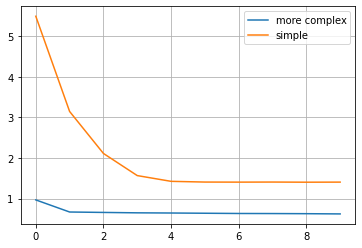

In [60]:
import matplotlib.pyplot as plt
plt.plot(results.history['mse'], label = 'more complex')
plt.plot(history.history['mse'], label = 'simple')
plt.legend()
plt.grid();

In [66]:
def modeler(X_train, y_train, X_test, y_test):
    network = Sequential()
    network.add(Dense(32, input_shape = (X_train.shape[1], ), activation = 'relu'))
    network.add(Dense(64, activation = 'relu'))
    network.add(Dense(1, activation = 'linear'))
    network.compile(loss = 'mae', metrics = ['mse'])
    fit_model = network.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 100, verbose = 0)
    return fit_model

In [67]:
results = modeler(X_train, y_train, X_test, y_test)

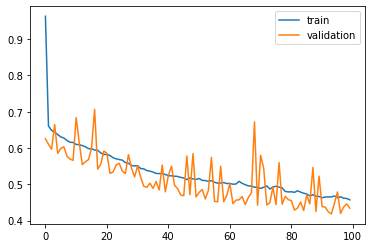

In [68]:
plt.plot(results.history['mse'], label = 'train')
plt.plot(results.history['val_mse'], label = 'validation')
plt.legend()

In [69]:
from keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier

In [70]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [84]:
def modeler():
    network = Sequential()
    network.add(Dense(32, activation = 'relu'))
    network.add(Dense(64, activation = 'relu'))
    network.add(Dense(1, activation = 'linear'))
    network.compile(loss = 'mae', metrics = ['mse'])
    #fit_model = network.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 100, verbose = 0)
    return network

In [90]:
poly = PolynomialFeatures()
scaler = MaxAbsScaler()
reg = KerasRegressor(build_fn=modeler, epochs = 20)

In [91]:
ann_pipe = make_pipeline(poly, scaler, reg)

In [92]:
X, y = cali.data, cali.target

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [94]:
ann_pipe.fit(X_train, y_train)

Epoch 1/20
484/484 [==============================] - 0s 370us/step - loss: 0.6508 - mse: 0.8382
Epoch 2/20
484/484 [==============================] - 0s 363us/step - loss: 0.5654 - mse: 0.6306
Epoch 3/20
484/484 [==============================] - 0s 364us/step - loss: 0.5492 - mse: 0.6060
Epoch 4/20
484/484 [==============================] - 0s 365us/step - loss: 0.5375 - mse: 0.5893
Epoch 5/20
484/484 [==============================] - 0s 364us/step - loss: 0.5303 - mse: 0.5780
Epoch 6/20
484/484 [==============================] - 0s 366us/step - loss: 0.5243 - mse: 0.5687
Epoch 7/20
484/484 [==============================] - 0s 370us/step - loss: 0.5175 - mse: 0.5595
Epoch 8/20
484/484 [==============================] - 0s 370us/step - loss: 0.5143 - mse: 0.5534
Epoch 9/20
484/484 [==============================] - 0s 366us/step - loss: 0.5090 - mse: 0.5447
Epoch 10/20
484/484 [==============================] - 0s 368us/step - loss: 0.5039 - mse: 0.5339
Epoch 11/20
484/484 [========

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('maxabsscaler', MaxAbsScaler()),
                ('kerasregressor',
                 <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7fd9d84ddfd0>)])

In [95]:
preds = ann_pipe.predict(X_test)

In [96]:
ann_pipe.score(X_test, y_test)

162/162 [==============================] - 0s 305us/step - loss: 0.4823 - mse: 0.5112


-0.4822537302970886

In [97]:
from sklearn.metrics import mean_squared_error

In [99]:
mean_squared_error(y_test, preds)

0.5111959890982332

### Classification with Keras

In [100]:
from sklearn.datasets import load_breast_cancer

In [101]:
cancer = load_breast_cancer()

In [102]:
X, y = cancer.data, cancer.target

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [117]:
network2 = Sequential()
network2.add(Dense(64, activation = 'relu'))
network2.add(Dense(128, activation = 'relu'))
network2.add(Dense(1, activation = 'sigmoid'))

network2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])

history = network2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 100, verbose = 0)

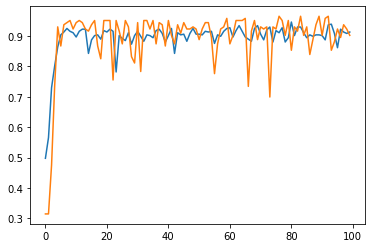

In [118]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

In [119]:
from keras.callbacks import EarlyStopping

In [124]:
callback = EarlyStopping(patience=10)

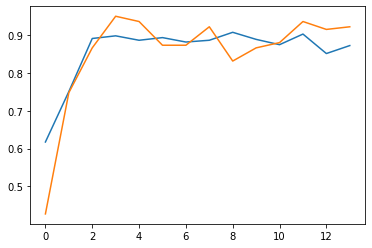

In [125]:
network2 = Sequential()
network2.add(Dense(64, activation = 'relu'))
network2.add(Dense(128, activation = 'relu'))
network2.add(Dense(1, activation = 'sigmoid'))

network2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])

history = network2.fit(X_train, y_train, 
                       validation_data=(X_test, y_test), 
                       epochs = 100, verbose = 0, 
                       callbacks = callback)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

In [133]:
def modeler_classification():
    network2 = Sequential()
    
    network2.add(Dense(64, activation = 'relu'))
    network2.add(Dense(128, activation = 'relu'))
    network2.add(Dense(20, activation = 'relu'))
    network2.add(Dense(60, activation = 'relu'))
    
    
    network2.add(Dense(1, activation = 'sigmoid'))
    
    network2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
    return network2

In [134]:
scaler = MaxAbsScaler()
clf = KerasClassifier(modeler_classification, epochs = 20)

In [135]:
class_pipe = make_pipeline(scaler, clf)

In [136]:
class_pipe.fit(X_train, y_train)

Epoch 1/20
14/14 [==============================] - 0s 591us/step - loss: 0.6618 - acc: 0.7746
Epoch 2/20
14/14 [==============================] - 0s 572us/step - loss: 0.5851 - acc: 0.8404
Epoch 3/20
14/14 [==============================] - 0s 585us/step - loss: 0.4451 - acc: 0.8944
Epoch 4/20
14/14 [==============================] - 0s 586us/step - loss: 0.3028 - acc: 0.9085
Epoch 5/20
14/14 [==============================] - 0s 566us/step - loss: 0.2208 - acc: 0.9155
Epoch 6/20
14/14 [==============================] - 0s 554us/step - loss: 0.1829 - acc: 0.9249
Epoch 7/20
14/14 [==============================] - 0s 602us/step - loss: 0.1678 - acc: 0.9249
Epoch 8/20
14/14 [==============================] - 0s 574us/step - loss: 0.1606 - acc: 0.9225
Epoch 9/20
14/14 [==============================] - 0s 607us/step - loss: 0.1498 - acc: 0.9319
Epoch 10/20
14/14 [==============================] - 0s 571us/step - loss: 0.1258 - acc: 0.9437
Epoch 11/20
14/14 [==============================

Pipeline(steps=[('maxabsscaler', MaxAbsScaler()),
                ('kerasclassifier',
                 <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fda1a5b5400>)])